<a href="https://colab.research.google.com/github/jang3463/machinelearning-deeplearning-lecture/blob/main/%ED%8E%B8%EB%AF%B8%EB%B6%84%2C%EA%B2%BD%EC%82%AC%ED%95%98%EA%B0%95%EB%B2%95_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%EA%B5%AC%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 편미분
한쪽 변수 방향으로만 미분 하는 것이다. 다른 쪽 변수는 상수로 취급한다.

$$
f(x_0, x_1) = x^2_0 + x^2_1
$$


In [63]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import datasets
mnist = datasets.mnist

In [6]:
def numerical_diff(f, x):
  h = 1e-4 # 0.0001
  return (f(x+h) - f(x-h)) / (2 * h)

In [31]:
def function_2(x):
    return x[0]**2 + x[1]**2

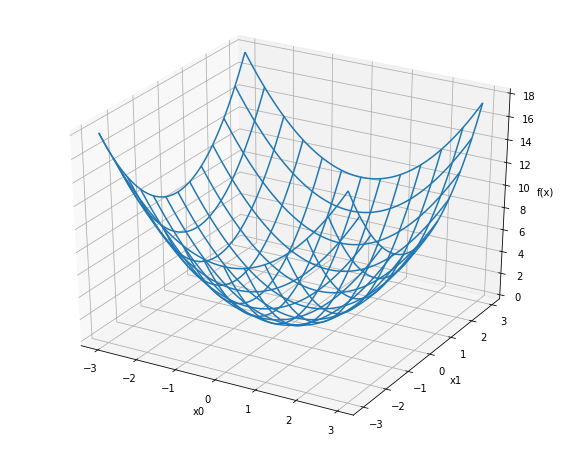

In [32]:
import matplotlib.pyplot as plt
import numpy as np

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='3d')

X0 = np.arange(-3, 3, 0.05)
X1 = np.arange(-3, 3, 0.05)

X0, X1 = np.meshgrid(X0, X1)
Z = function_2([X0,X1])

ax.plot_wireframe(X=X0, Y=X1, Z=Z,rstride=10, cstride=10)
ax.set_xlabel('x0')
ax.set_ylabel('x1')
ax.set_zlabel('f(x)')
plt.show()

1. 미분을 함에 있어서 고려해야할 방향이 2개
 * $x_0$, $x_1$ 방향으로 고려해야 한다.

2. 둘 중 하나의 방향으로만 미분을 수행한다. -> **편미분**
 * 즉 $x_0$의 미분을 수행할 때는 $x_1$을 상수처럼 취급한다. $\frac{\partial f}{\partial x_0}$
 * $x_1$의 미분을 수행할 때는 $x_0$을 상수처럼 취급한다. $\frac{\partial f}{\partial x_1}$

In [33]:
def function_temp1(x0):
    return x0**2 +4.0**2.0

numerical_diff(function_temp1,3)

6.00000000000378

In [34]:
def function_temp2(x1):
    return 3**2 +x1**2.0

numerical_diff(function_temp1,4)

7.999999999999119

$x_0$와 $x_1$ 각각의 편미분 결과를 $(\frac{\partial f}{\partial x_0} , \frac{\partial f}{\partial x_1})$로 정리 한 것을 **기울기(gradient)**라고 한다.

In [35]:
# 기울기를 구하는 코드 - 각각의 편미분을 배열로 만든다.
def numerical_gradient(f, x):
  h = 1e-4
  # 기울기를 저장할 배열
  grad = np.zeros_like(x) # x와 형상(shape)이 같은 배열을 생성

  for idx in range(x.size):
    # x의 값을 idx에 맞게 하나씩 빼온다.
    tmp_val = x[idx]

    # 각 좌표에서의 미분을 수행 -> 편미분

    # 1. f(x+h) 계산
    x[idx] = tmp_val + h
    fxh1 = f(x)

    # 2. f(x-h) 계산
    x[idx] = tmp_val - h
    fxh2 = f(x)

    # 3. 기울기 계산해서 grad 배열에 저장 ( 미분 수행 )
    grad[idx] = (fxh1 - fxh2) / 2*h

    # x[idx]를 원래 값으로 복구
    x[idx] = tmp_val

  return grad

In [36]:
result = numerical_gradient(function_2, np.array([3.0, 4.0]))
print("x = [3, 4] 일 때의 기울기 배열 : {}".format(result))

x = [3, 4] 일 때의 기울기 배열 : [6.e-08 8.e-08]


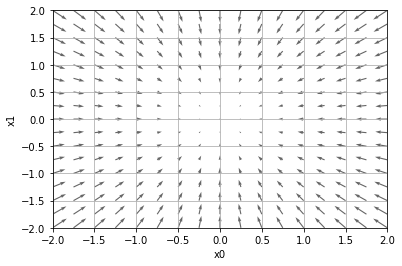

In [37]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x) # x와 형상이 같은 배열을 생성
    
    for idx in range(x.size):
        tmp_val = x[idx]
        
        # f(x+h) 계산
        x[idx] = float(tmp_val) + h
        fxh1 = f(x)
        
        # f(x-h) 계산
        x[idx] = tmp_val - h 
        fxh2 = f(x) 
        
        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val # 값 복원
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.draw()
    plt.show()

In [44]:
# 경사하강법 구현
# 편미분, lr, step_num, 초기 x 좌표


def gradient_descent(f, init_x, lr=0.01, step_num=100):
  x = init_x
  xlist = []

  for i in range(step_num):
    grad = numerical_gradient(f, x)
    x -= lr*grad
    print('기울기:{} \t x 좌표 : {}'.format(grad,x))
  return x

In [46]:
gradient_descent(function_2,np.array([3.0,4.0]))

기울기:[6. 8.] 	 x 좌표 : [2.94 3.92]
기울기:[5.88 7.84] 	 x 좌표 : [2.8812 3.8416]
기울기:[5.7624 7.6832] 	 x 좌표 : [2.823576 3.764768]
기울기:[5.647152 7.529536] 	 x 좌표 : [2.76710448 3.68947264]
기울기:[5.53420896 7.37894528] 	 x 좌표 : [2.71176239 3.61568319]
기울기:[5.42352478 7.23136637] 	 x 좌표 : [2.65752714 3.54336952]
기울기:[5.31505429 7.08673905] 	 x 좌표 : [2.6043766  3.47250213]
기울기:[5.2087532  6.94500427] 	 x 좌표 : [2.55228907 3.40305209]
기울기:[5.10457814 6.80610418] 	 x 좌표 : [2.50124329 3.33499105]
기울기:[5.00248657 6.6699821 ] 	 x 좌표 : [2.45121842 3.26829123]
기울기:[4.90243684 6.53658246] 	 x 좌표 : [2.40219405 3.2029254 ]
기울기:[4.8043881  6.40585081] 	 x 좌표 : [2.35415017 3.13886689]
기울기:[4.70830034 6.27773379] 	 x 좌표 : [2.30706717 3.07608956]
기울기:[4.61413434 6.15217911] 	 x 좌표 : [2.26092582 3.01456777]
기울기:[4.52185165 6.02913553] 	 x 좌표 : [2.21570731 2.95427641]
기울기:[4.43141462 5.90855282] 	 x 좌표 : [2.17139316 2.89519088]
기울기:[4.34278632 5.79038176] 	 x 좌표 : [2.1279653  2.83728706]
기울기:[4.2559306  5.67457413]

array([0.39785867, 0.53047822])

In [47]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
%cd /content/drive/MyDrive

/content/drive/MyDrive


In [50]:
import numpy as np
from common.functions import softmax,cross_entropy_error
from common.gradient import numerical_gradient

# 신경망에서의 기울기

신경망 학습이란 손실함수(loss)의 값을 최소화 시키는 가중치 w와 편향 b를 구하는 것이다.


따라서 가중치의 기울기 배열을 구할 수 있지 않을까?
- Loss에대한 w의 미분값을 구하는 것
- W가 변했을때 Loss는 얼마만큼 변할 것인가?

In [51]:
# 클래스로 하는 이유
# keras,tf,pytorch등을 사용하면 보통 개발자가 직접 커스터마이징 하는 경우가 많다.
# 아주 기본적인 CNN, RNN(LSTM) 같은 경우는 그냥 쓰면 되지만, 실제 실무에서는 이런일이 많이 없다.
# 특정한 비즈니스에 맞춰서 레이어를 커스터마이징 하는 것이 필요

class SimpleNet:

  # 신경망에서의 초기화는 필요한 매개변수를 준비하는 과정이다.
  def __init__(self):
    self.W = np.random.randn(2,3) # 정규분포로 초기화
    #실제 신경망은 np.random.randn(2,3) * 0.01 로 만드는 경우가 많다 (표준편차를 0.01로 설정)

  def predict(self,x):
    return np.dot(x,self.W)

  def loss(self,x,t):
    # loss를 구하는 과정

    # 1.예측
    z = self.predict(x)
    # 2.softmax 통과
    y = softmax(z)
    # 3.loss함수를 이용해 실제 loss값 구하기
    loss = cross_entropy_error(y,t)
    return loss

In [53]:
net = SimpleNet()

print('가중치 확인 : \n{}'.format(net.W))

가중치 확인 : 
[[ 1.24855156 -0.40358696 -0.65877845]
 [ 0.77347112  1.0727318   0.55917045]]


In [54]:
x = np.array([0.6,0.9])
p = net.predict(x)

print('단순 예측값 : \n{}'.format(p))

단순 예측값 : 
[1.44525494 0.72330645 0.10798634]


In [55]:
print('최댓값의 인덱스 : {}'.format(np.argmax(p)))

최댓값의 인덱스 : 0


In [56]:
# 임의의 정답을 마련하자
t = np.array([0,1,0]) # 정답은 1

net.loss(x,t)

1.2806301113680694

Loss에 대한 기울기를 구하는 함수를 따로 만들자

In [58]:
#Loss에 대한 w의 기울기를 구하기 위한 함수
def f(W):
  return net.loss(x,t)

# 기울기에 대한 Loss의 기울기 배열을 구할 수 있다

dw = numerical_gradient(f,net.W)
dw

array([[ 0.34317733, -0.43328261,  0.09010528],
       [ 0.514766  , -0.64992391,  0.13515791]])

# MNIST 신경망 구현하기

* 2층 신경망
* 1층 은닉층의 뉴런 개수는 100개
 * 활성화 함수로 시그모이드 사용

* 2층 출력층의 뉴런 개수는 10개
 * softmax를 사용함

* loss는 cross entropy error 사용할 것
* predict에서 softmax 적용할 것
* 내부에 기울기 배열을 구하는 numerical_gradient 구현
* 경사하강법을 여기서 구현하는 것은 아님!


In [71]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
  # input_size : 입력 데이터 shape
  # hidden_size : 은닉층의 뉴런 개수
  # output_size : 출력층의  뉴런 개수
  # weight_init_std : 아직 신경 ㄴㄴ

  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.output_size = output_size

    self.W1 = weight_init_std * np.random.randn(self.input_size, self.hidden_size)
    self.b1 = np.random.randn(self.hidden_size)

    self.W2 = weight_init_std * np.random.randn(self.hidden_size, self.output_size)
    self.b2 = np.random.randn(self.output_size)

  def predict(self, x):
    z1 = np.dot(x, self.W1) + self.b1
    a1 = sigmoid(z1)

    z2 = np.dot(a1, self.W2) + self.b2
    y = softmax(z2)

    return y

  def loss(self, x, t):
    y = self.predict(x)
    loss_val = cross_entropy_error(y,t)
    return loss_val
  
  def accuracy(x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y==t) / float(x.shape[0])
    return accuracy

  # 매개변수들의 기울기 배열을 구하는 함수
  def numerical_gradient_params(self, x, t):
    loss_W  = lambda W : self.loss(x,t)
    # 각 층에서 구해지는 기울기를 저장할 딕셔너리
    # 저장하는 이유 : 각 매개변수의 기울기를 저장 해야만 나중에 경사하강법을 수행 할 수 있다.
    grads = {}
    grads['W1'] = numerical_gradient(loss_W, self.W1)
    grads['b1'] = numerical_gradient(loss_W, self.b1)
    grads['W2'] = numerical_gradient(loss_W, self.W2)
    grads['b2'] = numerical_gradient(loss_W, self.b2)

    return grads

In [72]:
from common.functions import *
from common.gradient import numerical_gradient

class TwoLayerNet:
  # input_size : 입력 데이터 shape( 이미지 크기 ( 28 * 28 ))
  # hidden_size : 은닉층의 뉴런 개수
  # output_size : 출력층의 뉴런 개수
  # weight_init_std :  정규분포 랜덤값에 표준편차를 적용하기 위함

  def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
    # 나중에 매개변수(W, B)들은 경사하강법으로 모두 한꺼번에 업데이트가 되어야 해요
    self.params = {}

    # 1층 매개변수 마련하기
    self.params["W1"] = weight_init_std * np.random.randn(input_size, hidden_size) # 정규분포 랜덤에다가 표준편차 0.01을 적용
    self.params["b1"] = np.zeros(hidden_size)

    # 2층(출력층) 매개변수 마련하기
    self.params["W2"] = weight_init_std * np.random.randn(hidden_size, output_size)
    self.params['b2'] = np.zeros(output_size)

  def predict(self, X):
    # 매개변수를 params에서 꺼내옵니다.
    W1, W2, b1, b2 = self.params["W1"], self.params["W2"], self.params["b1"], self.params["b2"]

    # 1층 계산
    z1 = np.dot(x, W1) + b1
    a1 = sigmoid(z1)

    # 2층 계산
    z2 = np.dot(a1, W2) + b2
    y = softmax(z2)

    return y

  def loss(self, x, t):
    # 1. predict
    y = self.predict(x)

    # 2. cee
    loss_val = cross_entropy_error(y, t)

    return loss_val
  
  # 구현 ㄴㄴ
  def accuracy(x, t):
    y = self.predict(x)
    y = np.argmax(y, axis=1)
    t = np.argmax(t, axis=1)

    accuracy = np.sum(y==t) / float(x.shape[0])
    return accuracy

  # 매개변수들의 기울기 배열을 구하는 함수
  def numerical_gradient_params(self, x, t):
    print("미분 시작")

    loss_W = lambda W : self.loss(x, t) # L값 ( 미분 대상 함수 )
    
    # 각 층에서 구해지는 기울기를 저장할 딕셔너리
    # 저장하는 이유 : 각 매개변수의 기울기를 저장 해야만 나중에 경사하강법을 수행할 수 있어요
    grads = {}

    # 1층 매개변수들의 기울기 구하기 (Loss에 대한 W1, b1의 기울기를 grads에 저장)
    grads["W1"] = numerical_gradient(loss_W, self.params["W1"])
    grads["b1"] = numerical_gradient(loss_W, self.params["b1"])

    # 2층 매개변수들의 기울기 구하기 (Loss에 대한 W2, b2의 기울기를 grads에 저장)
    grads["W2"] = numerical_gradient(loss_W, self.params["W2"])
    grads["b2"] = numerical_gradient(loss_W, self.params["b2"])
    
    print("미분 끝")

    return grads

In [73]:
input_size = 28*28
hidden_size = 100
output_size = 10

net = TwoLayerNet(input_size=input_size,hidden_size=hidden_size,output_size=output_size)

In [75]:
net.params['W1'].shape, net.params['W2'].shape

((784, 100), (100, 10))

In [76]:
# 신경망이 predict를 잘하는지를 보자

x = np.random.rand(100,784)
y = net.predict(x)

In [77]:
x.shape,y.shape

((100, 784), (100, 10))

# MNIST 데이터 로딩 및 전처리

In [79]:
from tensorflow.keras import datasets
mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [80]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

## 데이터 전처리

In [81]:
from sklearn.preprocessing import OneHotEncoder
y_train_dummy = OneHotEncoder().fit_transform(y_train.reshape(-1, 1))
y_train_dummy = y_train_dummy.toarray()
y_test_dummy = OneHotEncoder().fit_transform(y_test.reshape(-1, 1))
y_test_dummy = y_test_dummy.toarray()

In [82]:
y_train_dummy.shape, y_test_dummy.shape

((60000, 10), (10000, 10))

In [83]:
#feature 전처리
X_train = X_train.reshape(X_train.shape[0],-1)
X_train = X_train / 255.0  # 이미지 정규화 기법 255으로 나눠주면 모든 픽셀 데이터가 0~1 사이의 값을 갖게 되고 훈련이 쉽게 된다.

X_test = X_test.reshape(X_test.shape[0],-1)
X_test = X_test / 255

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

## 훈련(학습)

In [87]:
from tqdm import tqdm_notebook

# 반복 횟수 설정
iter_nums = 10000

# 미니 배치 설정 
train_size = X_train.shape[0]
batch_size = 100

# 학습률 설정
learning_rate = 0.1

net = TwoLayerNet(input_size=input_size,hidden_size=hidden_size,output_size=output_size)

In [90]:
for i in tqdm_notebook(range(iter_nums)):

  # 미니 배치 인덱스 선정
  batch_mask = np.random.choice(train_size, batch_size)

  # 미니 배치 만들기

  X_batch = X_train[batch_mask]
  t_batch = y_train_dummy[batch_mask]

  '''
  각 배치 마다의 기울기를 계산 
  netowork의 numerical_gradient_params에서 하는일 
  1. 예측
  2. cross_entropy_error를 이용한 LOss 구하기
  3. 구해진 Loss값을 이용해 미분을 수행해서 각 층의 매개변수 기울기를 저장
  '''

  grads = net.numerical_gradient_params(X_batch,t_batch)

  # 모든 매개변수의 기울기를 업데이트 (경사하강법)

  for key in grads.keys():
    net.params[key] -= learning_rate*grads[key] # 경사하강법 공식

    #갱신된 loss 확인
  loss = net.loss(X_batch,t_batch)
  print('Step {} -> Loss : {}'.format(i+1, loss) )

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


미분 시작
미분 끝
Step 1 -> Loss : 2.284958784835323
미분 시작


KeyboardInterrupt: ignored